In [2]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\david\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


C:\Users\david\AppData\Local\Temp\ipykernel_25220\2339599730.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_exploded['salary_year_avg'].dropna(inplace=True)


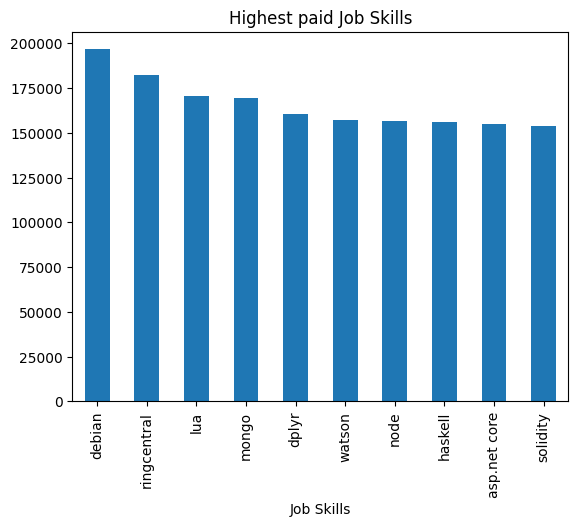

In [20]:
df_exploded = df.explode('job_skills')
df_exploded = df[['salary_year_avg','job_skills']]
df_exploded['salary_year_avg'].dropna(inplace=True)
df_exploded = df_exploded.groupby('job_skills').mean().sort_values(by='salary_year_avg', ascending=False)
df_exploded.head(10).plot(kind='bar')
plt.title('Highest paid Job Skills')
plt.xlabel('Job Skills')
plt.legend().set_visible(False)
plt.show()